In [2]:
from eval_gamefile import *

In [3]:
# save_game_eval(low_game_prun, 'low_game_prun_3.p')
low_game_base=load_eval('lowgame1.pgn4base.p')
low_game_rule=load_eval('lowgame1.pgn4rule.p')
mid_game_base=load_eval('midgame.pgn4base.p')
mid_game_rule=load_eval('midgame.pgn4rule.p')
high_game_base=load_eval('highgame.pgn4base.p')
high_game_rule=load_eval('highgame.pgn4rule.p')


In [13]:
import matplotlib.pyplot as plt
import numpy as np
def showsave_eval(eval_base,eval_rule, title, level, figtype):
    eval_gameorder = np.arange(1,  1+ len(eval_rule[1])/2 , 0.5)
    plt.title(title)
    if figtype== 'eval':
        plt.plot(eval_gameorder, eval_base[1], label = 'BasePlayer')
        plt.plot(eval_gameorder, eval_rule[1], label = 'PruningPlayer')
        plt.legend()
        plt.ylabel('Evaluation Score')
    if figtype == 'time':
        plt.plot(eval_gameorder, eval_base[3], label = 'BasePlayer')
        plt.plot(eval_gameorder, eval_rule[3], label = 'PruningPlayer')
        plt.legend()


        plt.ylabel('Time (s)')
        
    plt.xlabel('Turns')
    savename = level + '_game_' + figtype + '.jpg'
    # plt.savefig('low_game_eval.jpg')
    plt.savefig(savename)
    plt.close()
    

showsave_eval(low_game_base,low_game_rule,'Evaluation Metric Low Elo Game', 'low', 'eval')
showsave_eval(low_game_base,low_game_rule,'Evaluation Time Low Elo Game', 'low', 'time')

showsave_eval(mid_game_base,mid_game_rule,'Evaluation Metric Mid Elo Game', 'mid', 'eval')
showsave_eval(mid_game_base,mid_game_rule,'Evaluation Time Mid Elo Game', 'mid', 'time')

showsave_eval(high_game_base,high_game_rule,'Evaluation Metric High Elo Game', 'high', 'eval')
showsave_eval(high_game_base,high_game_rule,'Evaluation Time High Elo Game', 'high', 'time')


55 55


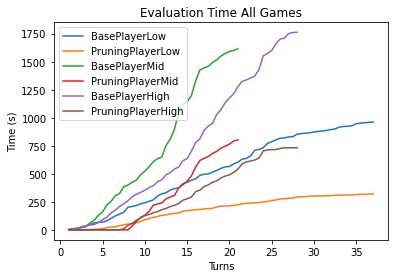

In [21]:
low_gameorder = np.arange(1,  1+ len(low_game_base[3])/2 , 0.5)
mid_gameorder = np.arange(1,  1+ len(mid_game_base[3])/2 , 0.5)
high_gameorder = np.arange(1,  1+ len(high_game_base[3])/2 , 0.5)
print(len(high_gameorder), len(high_game_base[3]))
plt.title('Evaluation Time All Games')
plt.plot(low_gameorder , low_game_base[3], label = 'BasePlayerLow')
plt.plot(low_gameorder ,  low_game_rule[3], label = 'PruningPlayerLow')
plt.plot(mid_gameorder,  mid_game_base[3], label = 'BasePlayerMid')
plt.plot(mid_gameorder,  mid_game_rule[3], label = 'PruningPlayerMid')
plt.plot(high_gameorder, high_game_base[3], label = 'BasePlayerHigh')
plt.plot(high_gameorder, high_game_rule[3], label = 'PruningPlayerHigh')
plt.legend()
plt.ylabel('Time (s)')
plt.xlabel('Turns')
# plt.show()
plt.savefig('all_game_time.jpg')

In [4]:
from stockfish import Stockfish

In [5]:
stockfish = Stockfish("stockfish/stockfish_13")


In [6]:
stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")


In [37]:
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")
def compare_with_stockfish(eval_game):
    stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
    
    suggested_moves = eval_game[-2]
    game_configs = eval_game[2]
    print(len(suggested_moves), len(game_configs))
    evals = []
    # print(suggested_moves)
    for i in range(1, len(game_configs)-1):
        temp = game_configs[i-1]
        print(temp)
        temp.push(temp.san(suggested_moves[i]))
        stockfish.set_fen_position(temp.fen())
        stockfish_eval = stockfish.get_evaluation()
        print(stockfish_eval)
        evals.append(stockfish_eval)
    return evals

In [38]:
compare_with_stockfish(low_game_base)

73 73
. . . r . . . .
. p . . . . k .
. . B . . p p .
p . q . . . . .
. . P . P . . .
. . K . . P . .
P P . . . . . .
. . . . . . . R


AssertionError: san() and lan() expect move to be legal or null, but got c1d2 in 3r4/1p4k1/2B2pp1/p1q5/2P1P3/2K2P2/PP6/7R w - - 1 38

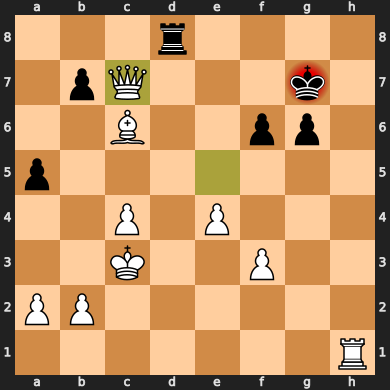

In [61]:
low_game_base[2][0]